In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\bokke\ML-projects\sms spame classifier\spam.csv',encoding='ISO-8859-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.shape

(5572, 5)

# 1.Data cleaning



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [9]:
df.sample(5)

,v1,v2
3958,ham,Have a nice day my dear.
787,spam,Ever thought about living a good life with a p...
3411,ham,No she didnt. I will search online and let you...
955,ham,Sorry i now then c ur msg... Yar lor so poor t...
4441,ham,Dear i am not denying your words please


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1916,ham,Fffff. Can you text kadeem or are you too far ...
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
1593,spam,PRIVATE! Your 2003 Account Statement for shows...
1223,ham,Rofl betta invest in some anti aging products
3451,ham,Ugh just got outta class


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['target']=le.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
3961,1,You have been specially selected to receive a ...
4490,0,"My friend, she's studying at warwick, we've pl..."
4561,0,How much u trying to get?
2759,0,"Can meh? Thgt some will clash... Really ah, i ..."
4098,0,If u dun drive then how i go 2 sch.


In [14]:
df.isna().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

# 2.EDA


In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

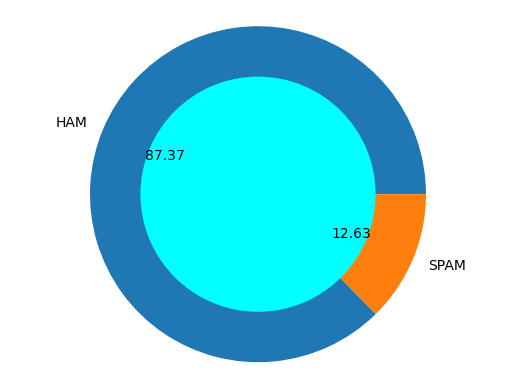

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['HAM','SPAM'],autopct='%0.2f', startangle=0)

# Draw a circle at the center to make it a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='cyan')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

plt.show()  
 
    #imbalance data

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bokke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_character']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:

#fetch no of words

df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_senteces']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
df[['num_character','num_words','num_senteces']].describe()

,num_character,num_words,num_senteces
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for ham
df[df['target']==0][['num_character','num_words','num_senteces']].describe()

,num_character,num_words,num_senteces
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: title={'center': 'NUMBER OF CHARACTERS'}, xlabel='num_character', ylabel='Count'>

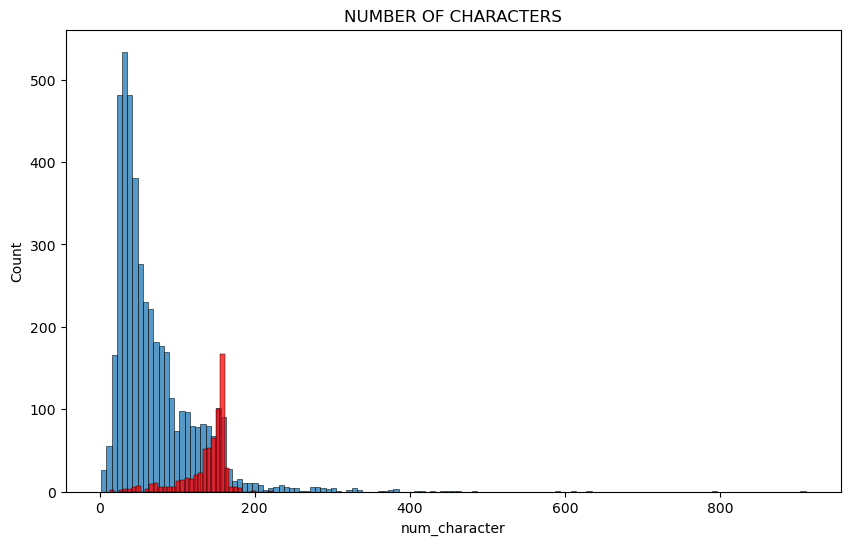

In [29]:
# hist to show number of characters in ham and spam
plt.figure(figsize=(10,6))
plt.title('NUMBER OF CHARACTERS')
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: title={'center': 'NUMBER OF WORDS'}, xlabel='num_words', ylabel='Count'>

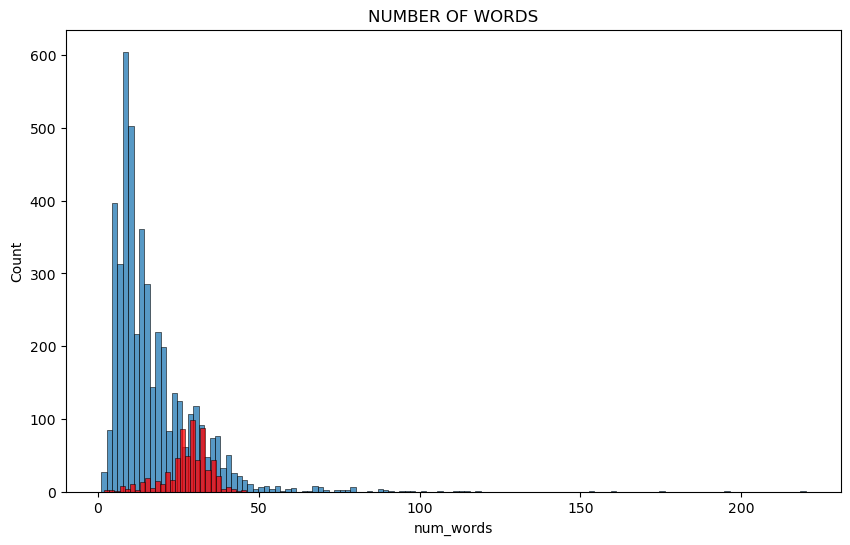

In [30]:
# hist to show number of words in ham and spam
plt.figure(figsize=(10,6))
plt.title('NUMBER OF WORDS')
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: title={'center': 'NUMBER OF SENTENCES'}, xlabel='num_senteces', ylabel='Count'>

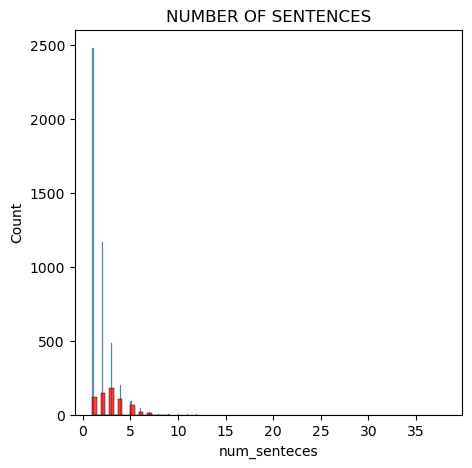

In [31]:
# hist to show number of sentences in ham and spam
plt.figure(figsize=(5,5))
plt.title('NUMBER OF SENTENCES')
sns.histplot(df[df['target']==0]['num_senteces'])
sns.histplot(df[df['target']==1]['num_senteces'],color='red')

C:\Users\bokke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


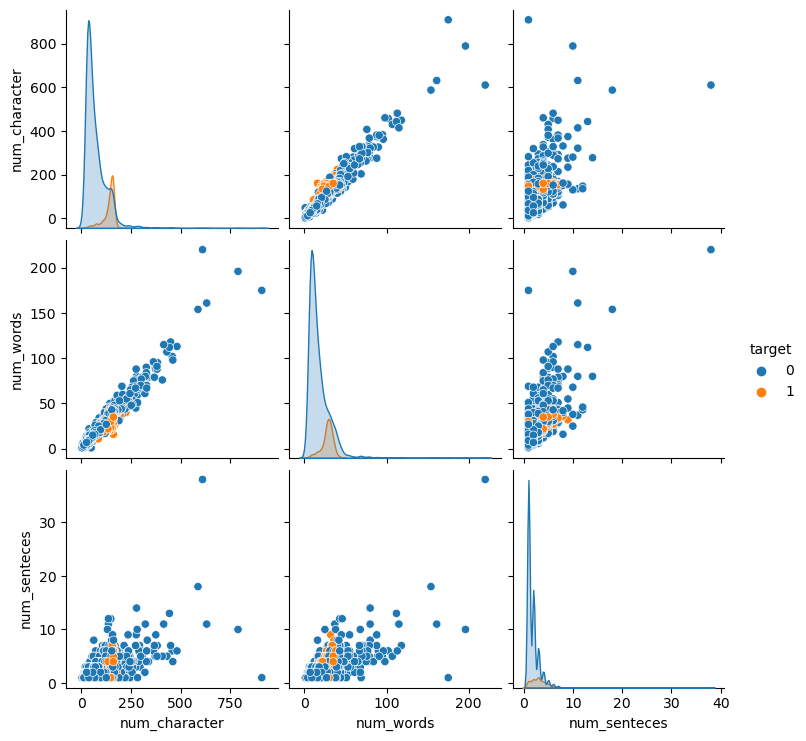

In [32]:
sns.pairplot(df,hue='target')

<Axes: >

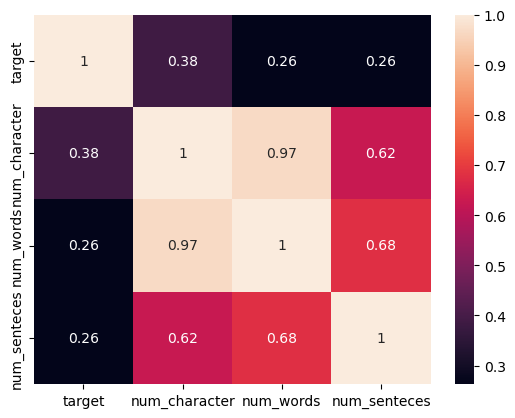

In [33]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot=True)

#### as we can see multicolinearity in the set out of 'num_character','num_words','num_senteces' we chose only one i.e num_character because it has good corelation with target value (0.38).

# 3.  Data Preprocessing(text_)
##  >lower case
##  >Tokenization
##  >Removing sto words
##  >stemming


In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bokke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bokke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def transform_text(text):
    text=text.lower()
    #translator = str.maketrans('', '', string.punctuation)
    #text = text.translate(translator)
    
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append( lemmatizer.lemmatize(i, pos='v'))
    
    return ' '.join(y)

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
transform_text('Hii Welcome.__ puneet!! 20 %% 20percent ??' )

'hii puneet 20 20percent'

In [45]:
print(df['text'][0])
transform_text(df['text'][0])


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'go jurong point crazy available bugis n great world la e buffet cine get amore wat'

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_character,num_words,num_senteces,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live around though


# word-cloud


In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=600, background_color='white', max_words=50,
                      contour_width=3, contour_color='steelblue', colormap='viridis')

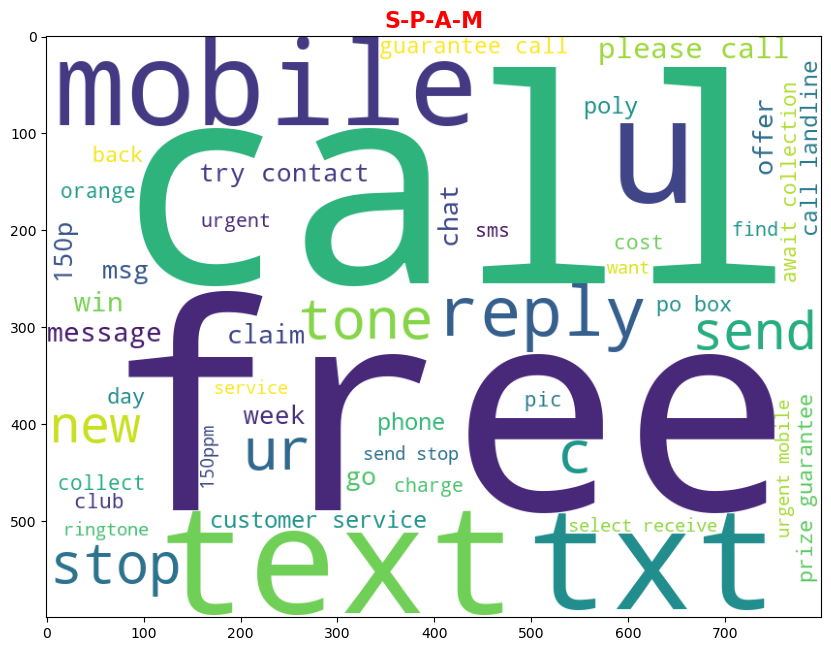

In [49]:
spam_cloud=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.title('S-P-A-M',fontsize=16, color='red', fontweight='bold')
plt.imshow(spam_cloud)


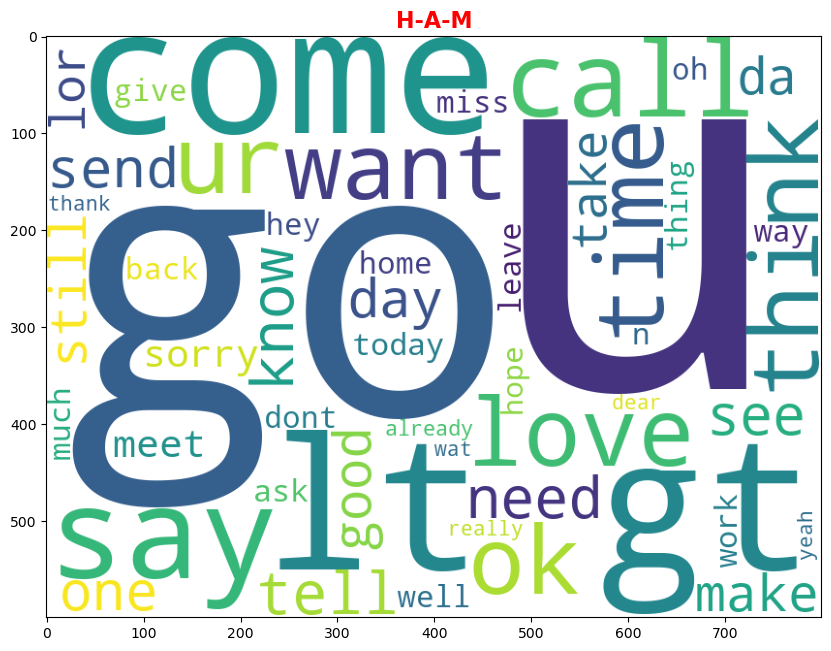

In [50]:
ham_cloud=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.title('H-A-M',fontsize=16, color='red', fontweight='bold')
plt.imshow(ham_cloud)


In [51]:
#separte  each ham and spam
spam_corpus=[]
a=df[df['target']==1]['transformed_text'].tolist()
for msg in a :
    for words in msg.split():
        spam_corpus.append(words)

In [52]:
len(spam_corpus)

9939

# creating dataframe for each ham and spam containing most commom 30 word with high frequence

In [53]:
from collections import Counter
s_data=pd.DataFrame(Counter(spam_corpus).most_common(30))


In [54]:
s_data.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,130
4,u,119


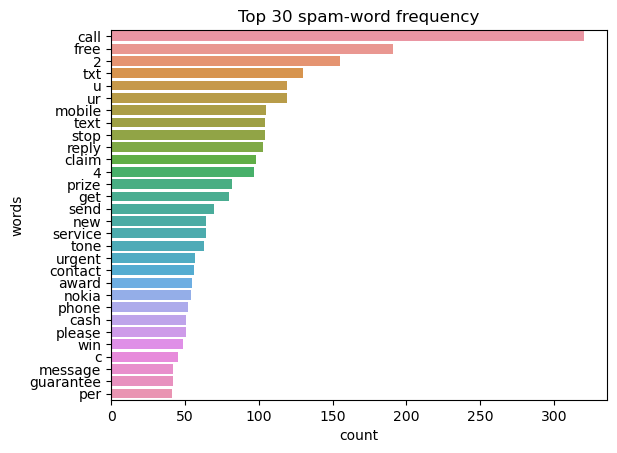

In [55]:
sns.barplot(x=s_data[1],y=s_data[0])
plt.title('Top 30 spam-word frequency')
plt.xlabel('count')
plt.ylabel('words')
plt.show()

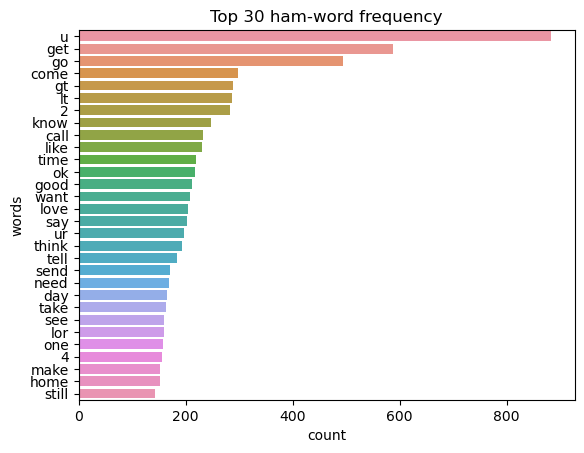

In [56]:
ham_corpus=[]
a=df[df['target']==0]['transformed_text'].tolist()
for msg in a :
    for words in msg.split():
        ham_corpus.append(words)
        
from collections import Counter
h_data=pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=h_data[1],y=h_data[0])
plt.title('Top 30 ham-word frequency')
plt.xlabel('count')
plt.ylabel('words')
plt.show()

# 4. model Building

In [57]:
#BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [58]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [59]:
x[0].shape

(7055,)

In [60]:
x.shape

(5169, 7055)

In [61]:
y=df['target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [66]:
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)

mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)

bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)


In [67]:
acc_gbn=accuracy_score(y_test,y_pred_gnb)
conf_gnb=confusion_matrix(y_test,y_pred_gnb)
class_repor_gnb=classification_report(y_test,y_pred_gnb)

acc_mnb=accuracy_score(y_test,y_pred_mnb)
conf_mtrx_mnb=confusion_matrix(y_test,y_pred_mnb)
class_report_mnb=classification_report(y_test,y_pred_mnb)

acc_bnb=accuracy_score(y_test,y_pred_bnb)
conf_mtrx_bnb=confusion_matrix(y_test,y_pred_bnb)
class_report_bnb=classification_report(y_test,y_pred_bnb)

In [68]:
print(class_report_mnb)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.84      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [69]:
#  console.print("[bold]HELLO[/bold]", style="white on black", size=(20, 1))

                                      MODEL-NAME = GaussianNB                                       

accuracy -  0.8752417794970987 

class-report
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       896
           1       0.52      0.88      0.65       138

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034



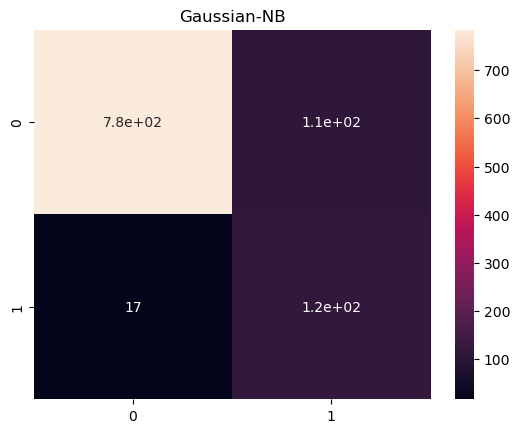

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


                                     MODEL-NAME = MultinomialNB                                     

accuracy -  0.9661508704061895 

class-report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.84      0.93      0.88       138

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034



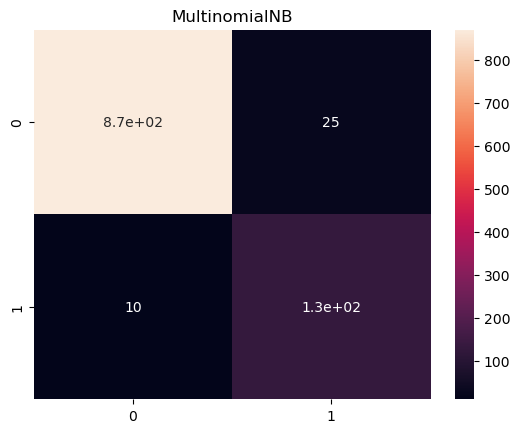

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


                                      MODEL-NAME = BernoulliNB                                      

accuracy -  0.9709864603481625 

class-report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



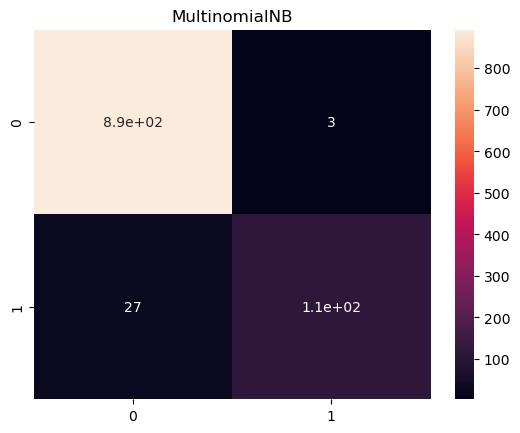

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [70]:
from rich.console import Console

console = Console()

console.print("[bold]MODEL-NAME = GaussianNB[/bold]", style="white on black", justify="center", width=100, height=5)
print('accuracy - ',acc_gbn,'\n')
print('class-report')
print(class_repor_gnb)
sns.heatmap(conf_gnb,annot=True)
plt.title('Gaussian-NB')
plt.show()
print('-'*250)

console.print("[bold]MODEL-NAME = MultinomialNB[/bold]", style="white on black", justify="center", width=100, height=5)
print('accuracy - ',acc_mnb,'\n')
print('class-report')
print(class_report_mnb)
sns.heatmap(conf_mtrx_mnb,annot=True)
plt.title('MultinomialNB')
plt.show()
print('-'*250)


console.print("[bold]MODEL-NAME = BernoulliNB[/bold]", style="white on black", justify="center", width=100, height=5)
print('accuracy - ',acc_bnb,'\n')
print('class-report')
print(class_report_bnb)
sns.heatmap(conf_mtrx_bnb,annot=True)
plt.title('MultinomialNB')
plt.show()
print('-'*250)




# Now using TF_IDF


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [72]:
x_=tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
x_[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
x_.shape

(5169, 3000)

In [75]:
y=df['target'].values

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)

mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)

bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)

acc_gbn=accuracy_score(y_test,y_pred_gnb)
conf_gnb=confusion_matrix(y_test,y_pred_gnb)
class_repor_gnb=classification_report(y_test,y_pred_gnb)

acc_mnb=accuracy_score(y_test,y_pred_mnb)
conf_mtrx_mnb=confusion_matrix(y_test,y_pred_mnb)
class_report_mnb=classification_report(y_test,y_pred_mnb)

acc_bnb=accuracy_score(y_test,y_pred_bnb)
conf_mtrx_bnb=confusion_matrix(y_test,y_pred_bnb)
class_report_bnb=classification_report(y_test,y_pred_bnb)

                                      MODEL-NAME = GaussianNB                                       

accuracy -  0.8646034816247582 

class-report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       896
           1       0.50      0.82      0.62       138

    accuracy                           0.86      1034
   macro avg       0.73      0.85      0.77      1034
weighted avg       0.91      0.86      0.88      1034



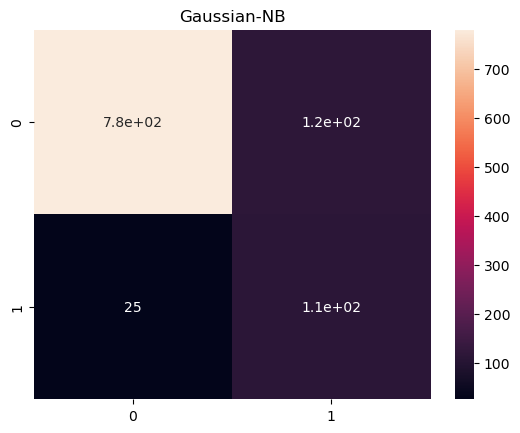

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


                                     MODEL-NAME = MultinomialNB                                     

accuracy -  0.971953578336557 

class-report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.79      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



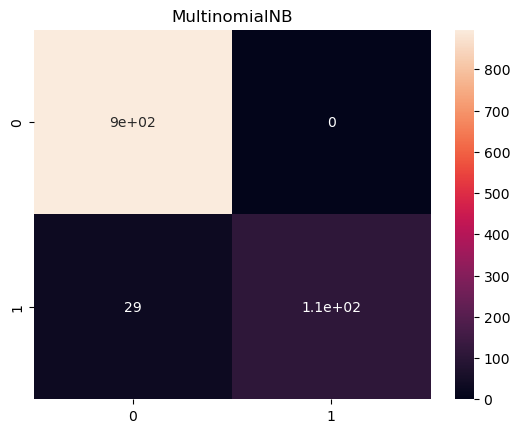

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


                                      MODEL-NAME = BernoulliNB                                      

accuracy -  0.9835589941972921 

class-report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



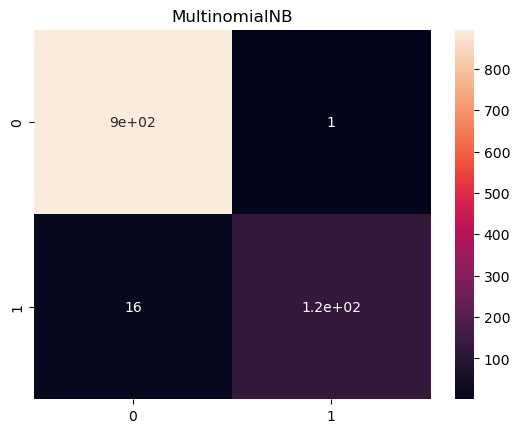

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [78]:
from rich.console import Console

console = Console()

console.print("[bold]MODEL-NAME = GaussianNB[/bold]", style="white on black", justify="center", width=100, height=5)
print('accuracy - ',acc_gbn,'\n')
print('class-report')
print(class_repor_gnb)
sns.heatmap(conf_gnb,annot=True)
plt.title('Gaussian-NB')
plt.show()
print('-'*250)

console.print("[bold]MODEL-NAME = MultinomialNB[/bold]", style="white on black", justify="center", width=100, height=5)
print('accuracy - ',acc_mnb,'\n')
print('class-report')
print(class_report_mnb)
sns.heatmap(conf_mtrx_mnb,annot=True)
plt.title('MultinomialNB')
plt.show()
print('-'*250)


console.print("[bold]MODEL-NAME = BernoulliNB[/bold]", style="white on black", justify="center", width=100, height=5)
print('accuracy - ',acc_bnb,'\n')
print('class-report')
print(class_report_bnb)
sns.heatmap(conf_mtrx_bnb,annot=True)
plt.title('MultinomialNB')
plt.show()
print('-'*250)


In [79]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

# Additional imports for model evaluation and data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [80]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etr=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)



In [81]:
clfrs={
    'SVc':svc,
    'KNeighborsClassifier':knc,
    'MultinomialNB':mnb,
    'DecisionTree':dtc,
    'LogisticRegression':lrc,
    'RandomForest':rfc,
    'AdaBoost':abc,
    'BaggingClassifier':bc,
    'ExtraTreesClassifier':etr,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier':xgb
    
}


In [82]:
def train_classifier(clfr,x_train,x_test,y_train,y_test):
    clfr.fit(x_train,y_train)
    y_pred=clfr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy , precision

In [83]:
train_classifier(rfc,x_train,x_test,y_train,y_test)

(0.9729206963249516, 0.9741379310344828)

In [84]:
accuracy_scores=[]
precision_scores=[]

for name,clfr in clfrs.items():
    
    current_accuracy,current_precision=train_classifier(clfr,x_train,x_test,y_train,y_test)
    
    print('for',name,'\n')
    print('accuracy -  ',current_accuracy,'\n')
    
    print('=-'*50)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVc 

accuracy -   0.9758220502901354 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
for KNeighborsClassifier 

accuracy -   0.9052224371373307 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
for MultinomialNB 

accuracy -   0.971953578336557 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
for DecisionTree 

accuracy -   0.9323017408123792 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
for LogisticRegression 

accuracy -   0.9535783365570599 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
for RandomForest 

accuracy -   0.9729206963249516 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
for AdaBoost 

accuracy -   0.9593810444874274 

=-=-=-=-=-=-=-=-=-=-=-

In [85]:
#performance_data=pd.DataFrame({'Algorithm':clfrs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [86]:
performance_df3=pd.DataFrame({'Algorithm':clfrs.keys(),'Accuracy_max_3000':accuracy_scores,'Precision_max_3000':precision_scores})

In [87]:
#performance_df2=pd.DataFrame({'Algorithm':clfrs.keys(),'Accuracy_max_3000 & scalling':accuracy_scores,'Precision_max_3000 & scalling':precision_scores})

In [88]:
performance_df2

NameError: name 'performance_df2' is not defined

In [ ]:
performance_data


In [ ]:
#performance_df1=pd.melt(performance_data,id_vars='Algorithm')

In [89]:
performance_df3

,Algorithm,Accuracy_max_3000,Precision_max_3000
0,SVc,0.975822,0.974790
1,KNeighborsClassifier,0.905222,1.000000
2,MultinomialNB,0.971954,1.000000
3,DecisionTree,0.932302,0.854167
4,LogisticRegression,0.953578,0.959184
5,RandomForest,0.972921,0.974138
6,AdaBoost,0.959381,0.944444
7,BaggingClassifier,0.956480,0.860465
8,ExtraTreesClassifier,0.977756,0.975207
9,GradientBoostingClassifier,0.949710,0.947917


In [90]:
performance_df=performance_data.merge(performance_df2)

NameError: name 'performance_data' is not defined

In [91]:
performance_df

NameError: name 'performance_df' is not defined

In [92]:
#performance_df=performance_df.merge(performance_df3)

In [101]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df3,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'value'

In [94]:
#model improve
#1.Change the Max_Features parameter of TF-IDF

In [95]:
#now voting  classifier   - ---- goal is precision 100 and accuracy >97.1


In [96]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting=VotingClassifier(estimators=[('svc',svc),('mnb',mnb),('Etc',etc)],voting='soft')

In [98]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('Etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
y_predVote=voting.predict(x_test)
print('accuracy',accuracy_score(y_test,y_predVote))
print('precision',precision_score(y_test,y_predVote))

accuracy 0.9787234042553191
precision 0.9833333333333333


## -As no improvment 
## -now we use MultinomialNB 

In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('MultiNB-model.pkl','wb'))